In [308]:
#!pip install dtreeviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split, cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [309]:
df = pd.read_csv('../d7/datasets/iris.data', header=None)
df["class"] = iris.target
df.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class", "Target"]
df.sample(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,Target
30,4.8,3.1,1.6,0.2,Iris-setosa,0
82,5.8,2.7,3.9,1.2,Iris-versicolor,1
67,5.8,2.7,4.1,1.0,Iris-versicolor,1
55,5.7,2.8,4.5,1.3,Iris-versicolor,1
119,6.0,2.2,5.0,1.5,Iris-virginica,2
136,6.3,3.4,5.6,2.4,Iris-virginica,2
1,4.9,3.0,1.4,0.2,Iris-setosa,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
21,5.1,3.7,1.5,0.4,Iris-setosa,0
121,5.6,2.8,4.9,2.0,Iris-virginica,2


In [305]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [306]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [292]:
X = df.drop("Target", axis=1)
Y = df["Target"]
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [293]:
X = X.drop(["Class"], axis=1)

In [294]:
X = X.values
Y = y.values

In [295]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
print(X_train[:10])
print(Y_train[:10])

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]]
[0 0 1 0 0 2 1 0 0 0]


In [296]:
from sklearn.preprocessing import MinMaxScaler

scaled_data = MinMaxScaler().fit_transform(X_train)
scaled_data

array([[0.08823529, 0.66666667, 0.        , 0.04166667],
       [0.41176471, 1.        , 0.0877193 , 0.125     ],
       [0.70588235, 0.45833333, 0.59649123, 0.54166667],
       [0.14705882, 0.58333333, 0.10526316, 0.04166667],
       [0.02941176, 0.5       , 0.05263158, 0.04166667],
       [0.58823529, 0.20833333, 0.70175439, 0.75      ],
       [0.61764706, 0.5       , 0.61403509, 0.58333333],
       [0.26470588, 0.625     , 0.0877193 , 0.04166667],
       [0.20588235, 0.66666667, 0.07017544, 0.04166667],
       [0.26470588, 0.875     , 0.0877193 , 0.        ],
       [0.44117647, 0.29166667, 0.71929825, 0.75      ],
       [0.5       , 0.58333333, 0.61403509, 0.625     ],
       [0.70588235, 0.45833333, 0.64912281, 0.58333333],
       [0.32352941, 0.79166667, 0.05263158, 0.125     ],
       [0.32352941, 0.70833333, 0.0877193 , 0.04166667],
       [0.35294118, 0.16666667, 0.47368421, 0.375     ],
       [0.58823529, 0.33333333, 0.71929825, 0.58333333],
       [0.61764706, 0.45833333,

In [297]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=9, random_state=77)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=77,
                       splitter='random')

In [298]:
clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [299]:
print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

1.0
0.9333333333333333


In [300]:
print(clf.get_depth())
print(clf.get_n_leaves())

9
12


In [301]:
clf.feature_importances_

array([0.        , 0.02649517, 0.73849966, 0.23500517])

In [302]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_2 <= 2.43
|   |--- class: 0
|--- feature_2 >  2.43
|   |--- feature_2 <= 5.50
|   |   |--- feature_3 <= 1.45
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.45
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- feature_2 <= 4.93
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  4.93
|   |   |   |   |   |--- feature_3 <= 1.57
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  1.57
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- feature_2 <= 5.28
|   |   |   |   |   |--- feature_1 <= 2.90
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  2.90
|   |   |   |   |   |   |--- feature_1 <= 3.06
|   |   |   |   |   |   |   |--- feature_2 <= 5.06
|   |   |   |   |   |   |   |   |--- feature_3 <= 1.78
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  1.78
|   |   |   |   |   |   |   |   |   |--- class: 2
|   | 

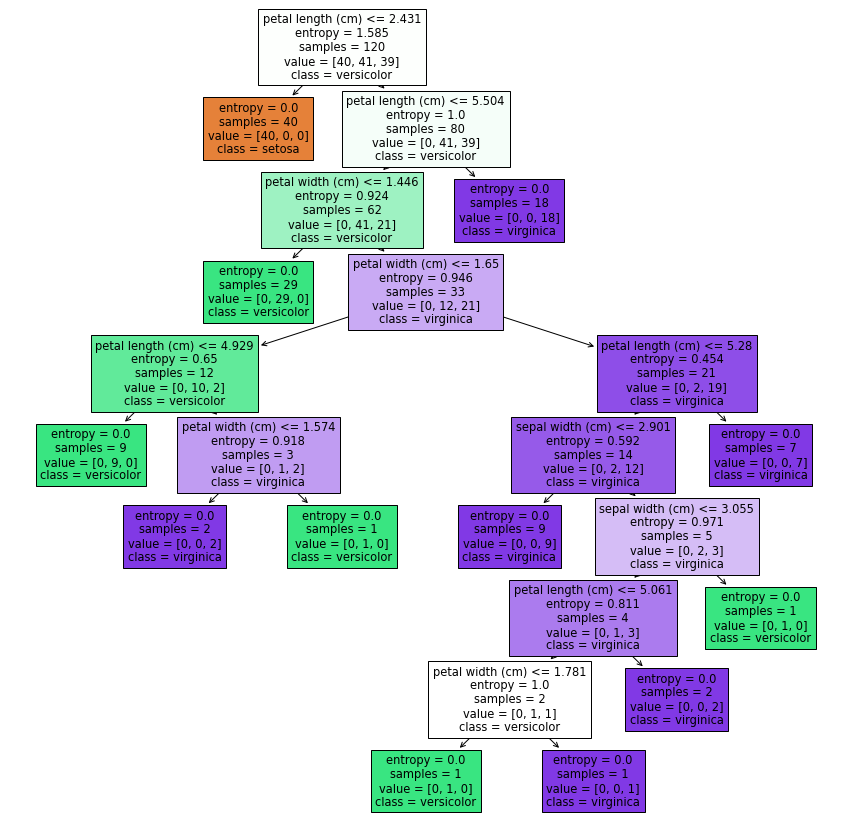

In [310]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
plt.savefig('tree_iris.jpg',format='jpg',bbox_inches = "tight")